# Flowchart for prediction pipeline

In [1]:
%matplotlib inline
# Static plots
#%matplotlib ipympl
# Interactive plots
import schemdraw
from schemdraw import flow

In [2]:
save_plot_flag = False

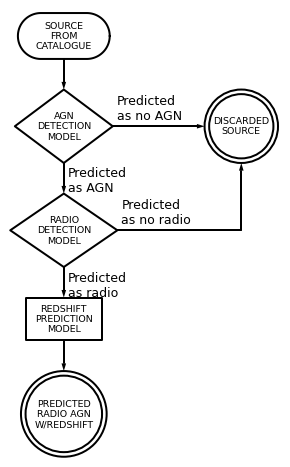

In [3]:
d = schemdraw.Drawing(fontsize=11)
d += (b := flow.Start(w=3, h=1.5).label('SOURCE\nFROM\nCATALOGUE'))
d += flow.Arrow().down().length(d.unit/3)
d += (d1 := flow.Decision(w=3.2, h=2.4, E='Predicted\nas no AGN', S='Predicted\nas AGN')
      .label('AGN\nDETECTION\nMODEL'))
d += flow.Arrow().length(d.unit/3)
d += (d2 := flow.Decision(w=3.5, h=2.4, E='Predicted\nas no radio', S='Predicted\nas radio')
      .label('RADIO\nDETECTION\nMODEL'))
d += flow.Arrow().length(d.unit/3)
d += (d3 := flow.Process(w=2.5, h=1.4)
      .label('REDSHIFT\nPREDICTION\nMODEL'))

# d += flow.Arrow().right().at(d3.E).length(d.unit/2)
# d += flow.Box(w=2, h=1.25).anchor('W').label('WAIT,\nWHAT?')
d += flow.Arrow().down().at(d3.S).length(d.unit/3)
d += (listen := flow.StateEnd(r=1.4).label('PREDICTED\nRADIO AGN\nW/REDSHIFT'))
# d += flow.Arrow().right().at(listen.E).length(d.unit/2)
# d += (hate := flow.Box(w=2, h=1.25).anchor('W').label('I HATE\nYOU.'))

d += flow.Arrow().right().at(d1.E).length(d.unit*1.0)
d += (good := flow.StateEnd(r=1.2).anchor('W').label('DISCARDED\nSOURCE'))
# d += flow.Arrow().right().at(d2.E).length(d.unit*1.0)
# d += (d4 := flow.Decision(w=5.3, h=4.0, E='YES', S='NO').anchor('W')
#       .label('...AND YOU CAN\nSEE THE ONES\nLABELED "NO"?'))

d += flow.Line().right().at(d2.E).tox(good.S)
d += flow.Arrow().up().toy(good.S)
# d += flow.Arrow().down().at(d4.S).length(d.unit/2)
# d += (d5 := flow.Decision(w=5, h=3.6, E='YES', S='NO')
#       .label('BUT YOU\nJUST FOLLOWED\nTHEM TWICE!'))
# d += flow.Arrow().right().at(d5.E).length(d.unit)
# d += (question := flow.Box(w=3.5, h=1.75).anchor('W')
#       .label("(THAT WASN'T\nA QUESTION.)"))
# d += flow.Line().down().at(d5.S).length(d.unit/3)
# d += flow.Line().right().tox(question.S)
# d += flow.Arrow().up().toy(question.S)

# d += flow.Line().right().at(good.E).tox(question.S)
# d += flow.Arrow().down().length(d.unit)
# d += (drink := flow.Box(w=2.5, h=1.5).label("LET'S GO\nDRINK."))
# d += flow.Arrow().right().at(drink.E).label('6 DRINKS')
# d += (flow.Box(w=3.7, h=2).anchor('W')
#       .label('HEY, I SHOULD\nTRY INSTALLING\nFREEBSD!'))
# d += flow.Arrow().up().at(question.N).length(d.unit*.75)
# d += (screw := flow.Box(w=2.5, h=1).anchor('S').label('SCREW IT.'))
# d += flow.Arrow().up().at(screw.N).toy(drink.S)
d.draw()
# if save_plot_flag:
#     d.save('plots/flowchart_pipeline_S82.pdf')